# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


In [4]:
# drop unnecessary column
print(data.shape)
print(data.columns)
data.drop(columns = ['Unnamed: 0','New_Price','Name'], inplace = True)
print(data.shape)

(6019, 14)
Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')
(6019, 11)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 517.4+ KB


In [6]:
# extract integer information
col_revised = ['Mileage','Engine','Power']
for i in col_revised:
    data[i] = data[i].str.replace(r'[^\d.]', '', regex=True)
    
print(data.info())
# checking non-available
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 517.4+ KB
None
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power   

In [7]:
# drop any rows where there is NA
data.replace('', float('nan'), inplace=True)
data.dropna(axis = 0, inplace = True)
print(data.isnull().sum())
print(data.shape)

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64
(5872, 11)


In [8]:
# astype
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(int)
data['Power'] = data['Power'].astype(float)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   int64  
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 550.5+ KB
None


In [9]:
# get_dummies for categorical var.
# one-hot encoding
data = pd.get_dummies(data = data, columns = ['Location','Fuel_Type','Transmission','Owner_Type'], drop_first = True)

In [10]:
print(data.head(10))

   Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price  \
0  2010              72000    26.60     998   58.16    5.0   1.75   
1  2015              41000    19.67    1582  126.20    5.0  12.50   
2  2011              46000    18.20    1199   88.70    5.0   4.50   
3  2012              87000    20.77    1248   88.76    7.0   6.00   
4  2013              40670    15.20    1968  140.80    5.0  17.74   
5  2012              75000    21.10     814   55.20    5.0   2.35   
6  2013              86999    23.08    1461   63.10    5.0   3.50   
7  2016              36000    11.36    2755  171.50    8.0  17.50   
8  2013              64430    20.54    1598  103.60    5.0   5.20   
9  2012              65932    22.30    1248   74.00    5.0   1.95   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0                   0                 0                    0  ...   
1                   0                 0                    0  ...   
2                   0            

In [11]:
# divide target from other features
# shallow copy caution!
y = data.Price
x = data.drop(columns = ['Price'])

<Axes: xlabel='Price', ylabel='Density'>

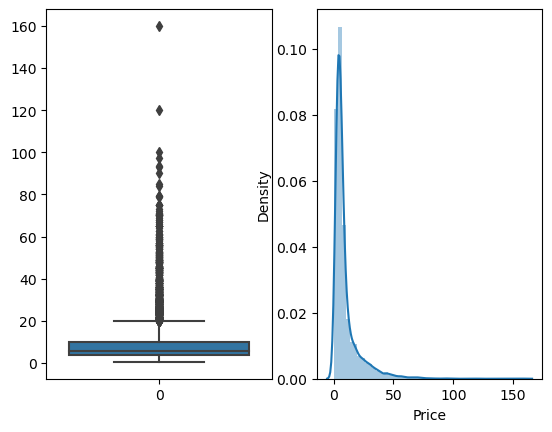

In [12]:
# check if target distribution is skewed
fig, ax = plt.subplots(1,2)
sns.boxplot(y, ax = ax[0])
sns.distplot(y, ax = ax[1])

In [13]:
# because it seems pretty much skewed, investigate the specifics
print(y.skew())
# which is higher than 2,normal
# needs log transformation or root transformation


3.3230887805574807


1.7073859624731769


<Axes: xlabel='Price', ylabel='Density'>

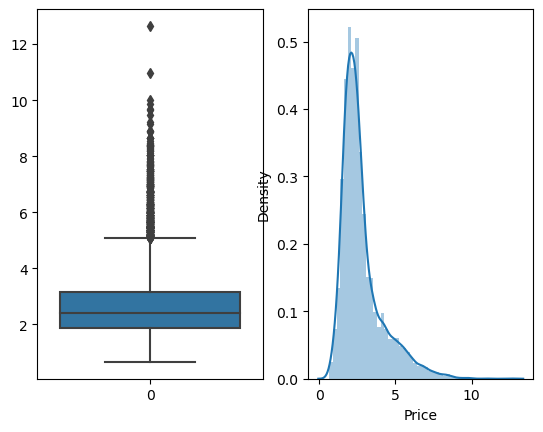

In [14]:
y_sqrt = np.sqrt(y)
print(y_sqrt.skew())

fig, ax = plt.subplots(1,2)
sns.boxplot(y_sqrt, ax = ax[0])
sns.distplot(y_sqrt, ax = ax[1])

0.4432126477722652


<Axes: xlabel='Price', ylabel='Density'>

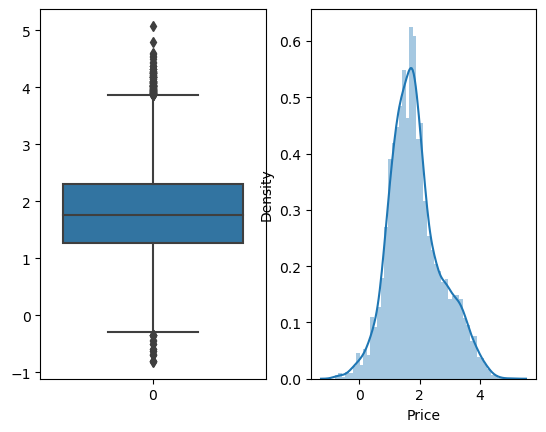

In [15]:
# it seems log transformation is reasonable
y_log = np.log(y)
print(y_log.skew())

fig, ax = plt.subplots(1,2)
sns.boxplot(y_log, ax = ax[0])
sns.distplot(y_log, ax = ax[1])

<Axes: >

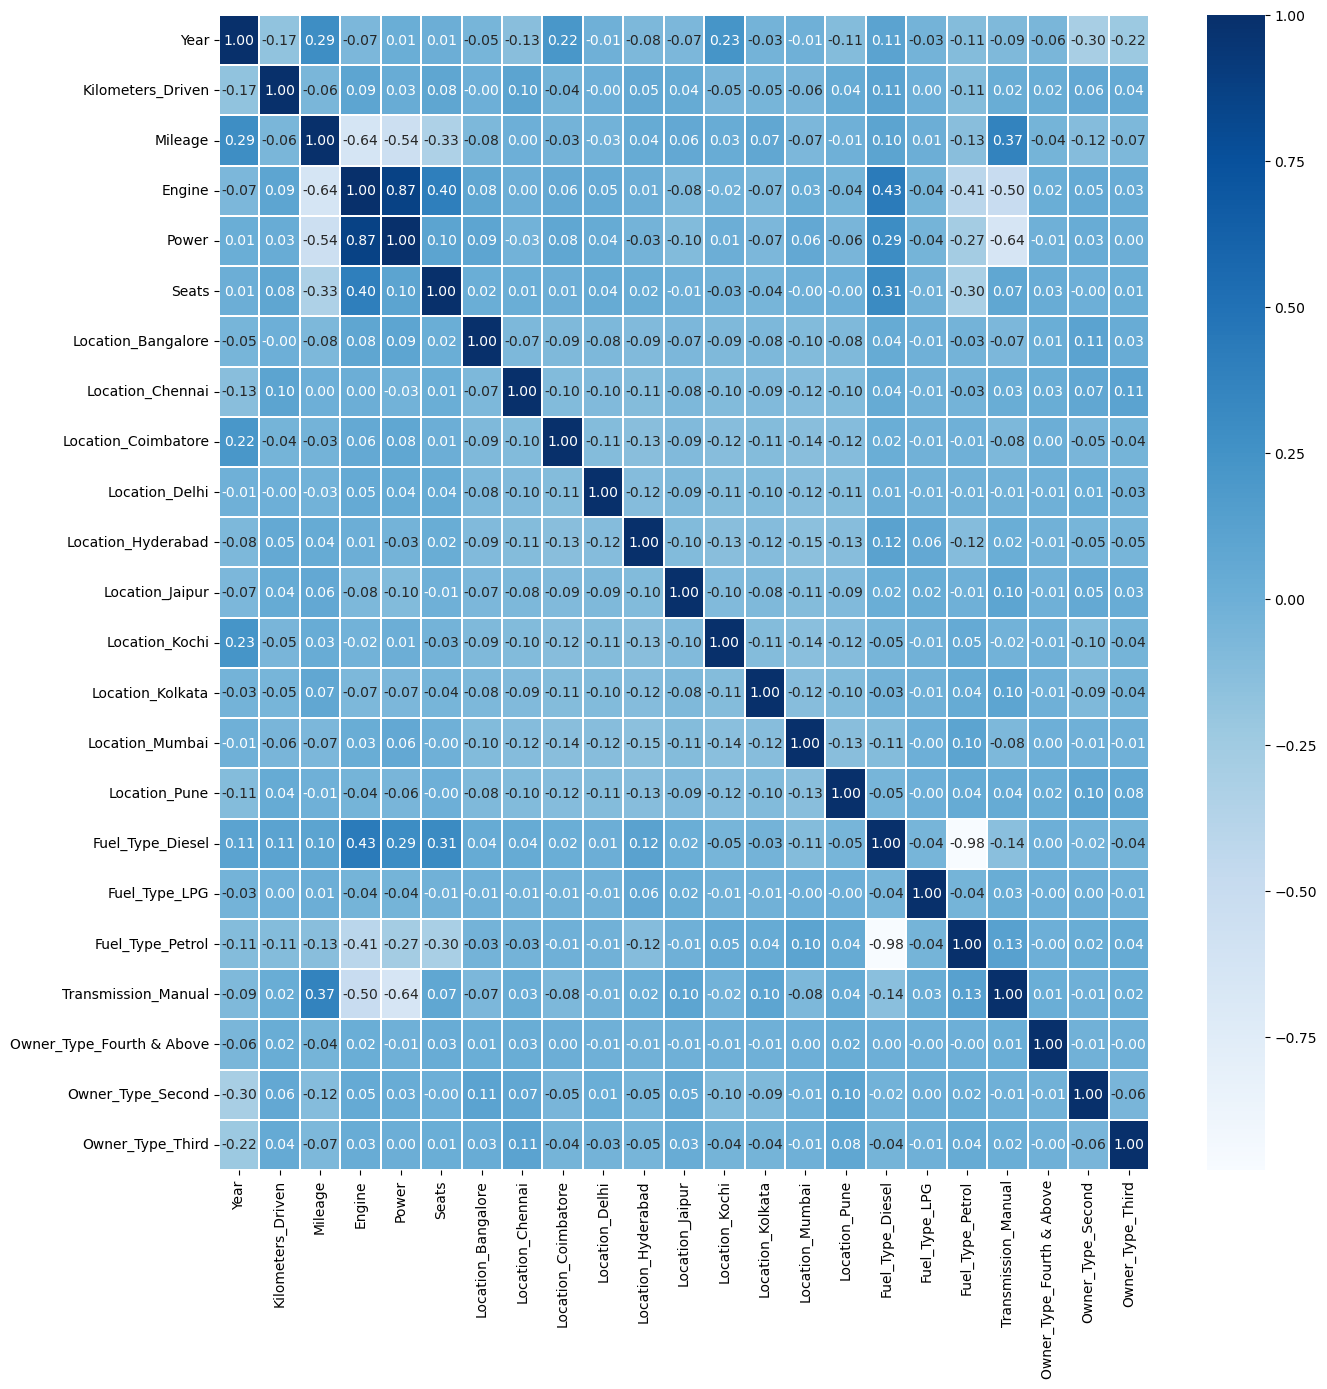

In [22]:
# between 'Engine', 'Power'
plt.figure(figsize=(15,15))
sns.heatmap(data = x.corr(), annot=True, fmt = '.2f', linewidths=.2, cmap='Blues')

In [23]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,373.723645,Year
5,79.929625,Seats
3,75.463476,Engine
16,60.615114,Fuel_Type_Diesel
18,52.628956,Fuel_Type_Petrol
2,51.379985,Mileage
4,37.006137,Power
19,6.331995,Transmission_Manual
14,4.581043,Location_Mumbai
10,4.281173,Location_Hyderabad


In [24]:
x2 = x.drop(['Year'],axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif["features"] = x2.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
2,72.915157,Engine
4,62.004531,Seats
15,41.632971,Fuel_Type_Diesel
3,36.321552,Power
17,28.907168,Fuel_Type_Petrol
1,26.363887,Mileage
18,6.315970,Transmission_Manual
13,4.304422,Location_Mumbai
9,4.037998,Location_Hyderabad
11,3.764351,Location_Kochi


In [25]:
# 으아아아아아아아아
x3 = x2.drop(['Engine'],axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x3.values, i) for i in range(x3.shape[1])]
vif["features"] = x3.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
3,41.675643,Seats
14,40.924195,Fuel_Type_Diesel
16,28.898754,Fuel_Type_Petrol
1,20.900767,Mileage
2,10.757255,Power
17,6.246559,Transmission_Manual
12,4.295233,Location_Mumbai
8,4.020678,Location_Hyderabad
10,3.757621,Location_Kochi
6,3.696240,Location_Coimbatore


In [16]:
x_train, x_test, y_log_train, y_log_test = train_test_split(x, y_log, test_size = 0.2, random_state = 2)

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
# 모델 적합
x_train = sm.add_constant(x_train)
model=sm.OLS(y_log_train,x_train,axis=1)
model_trained = model.fit()

/Users/inhyucksong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


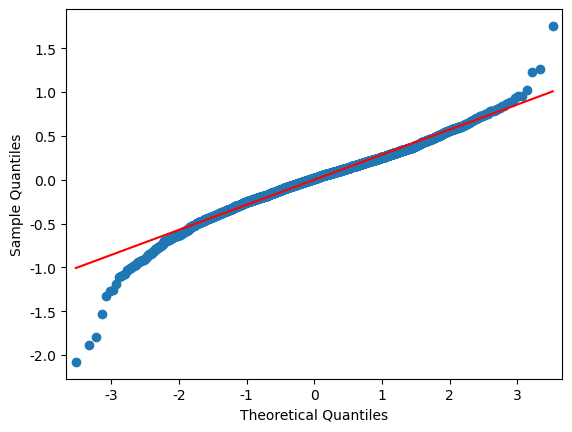

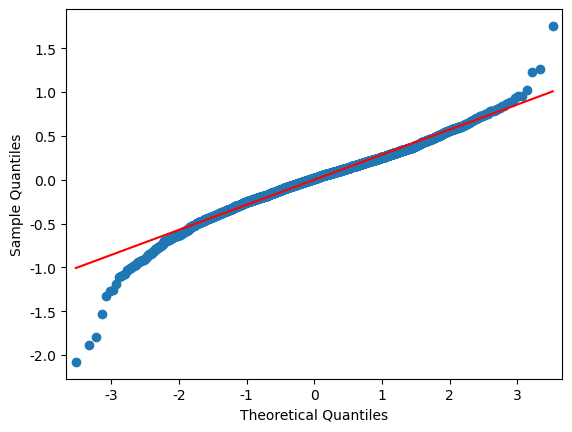

In [27]:
# 확률오차의 정규성
model_residuals=model_trained.resid

plt.rcParams["axes.unicode_minus"]=False #폰트 깨짐 방지
sm.ProbPlot(model_residuals).qqplot(line="s")

In [31]:
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1639.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:23:34   Log-Likelihood:                -785.66
No. Observations:                4697   AIC:                             1619.
Df Residuals:                    4673   BIC:                             1774.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [32]:
model=sm.OLS(y_log_train,x_train.drop(["Owner_Type_Fourth & Above"],axis=1))
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1714.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:24:53   Log-Likelihood:                -785.68
No. Observations:                4697   AIC:                             1617.
Df Residuals:                    4674   BIC:                             1766.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -249.8424    

In [33]:
model=sm.OLS(y_log_train,x_train.drop(["Owner_Type_Fourth & Above",'Location_Chennai'],axis=1))
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1796.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:25:50   Log-Likelihood:                -785.75
No. Observations:                4697   AIC:                             1616.
Df Residuals:                    4675   BIC:                             1758.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -249.8905    

In [35]:
model=sm.OLS(y_log_train,x_train.drop(["Owner_Type_Fourth & Above",'Location_Chennai','Seats','Fuel_Type_LPG'],axis=1))
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1985.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:26:46   Log-Likelihood:                -786.10
No. Observations:                4697   AIC:                             1612.
Df Residuals:                    4677   BIC:                             1741.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -250.2109    

In [36]:
x_test=sm.add_constant(x_test)
y_test_pred=np.exp(model_trained.predict(x_test.drop(["Owner_Type_Fourth & Above",'Location_Chennai','Seats','Fuel_Type_LPG'],axis=1)))
y_test_pred.head()

91      13.769429
3573     4.641415
2051     1.985618
1788     6.170535
3054     5.612726
dtype: float64

In [37]:
# determinant of coefficient
print(r2_score(np.exp(y_log_test),y_test_pred))

0.3786022515054972


In [38]:
# MSE
print(mean_squared_error(np.exp(y_log_test),y_test_pred))

94.5389051229232


In [39]:
# RMSE
print(np.sqrt(mean_squared_error(np.exp(y_log_test),y_test_pred)))

9.72311190529674
